In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import linregress
import json

####Read Chellenge data from json file

In [2]:
with open('Challenge2_data.json', 'r') as f:
    data = json.load(f)

# Extract data
m = np.array(data['Apparent Magitude (m)'])
M = np.array(data['Absolute Magnitude (M)'])
z = np.array(data['Redshift (z)'])

In [3]:
D_final = []
v_final = []

####Calculation for best-fit line and Plotting Data

In [4]:
for i in range(19):
    d = 10**((m[i] - M[i] - 25) / 5)  
    v = z[i] * 299792.458  
    D_final.append(d)  
    v_final.append(v)  

D_final = np.array(D_final)
v_final = np.array(v_final)

slope, intercept, r_value, p_value, std_err = linregress(D_final, v_final)

D_fit = np.linspace(min(D_final), max(D_final), 100)  # Distance range for plotting
v_fit = slope * D_fit + intercept  # Best-fit line

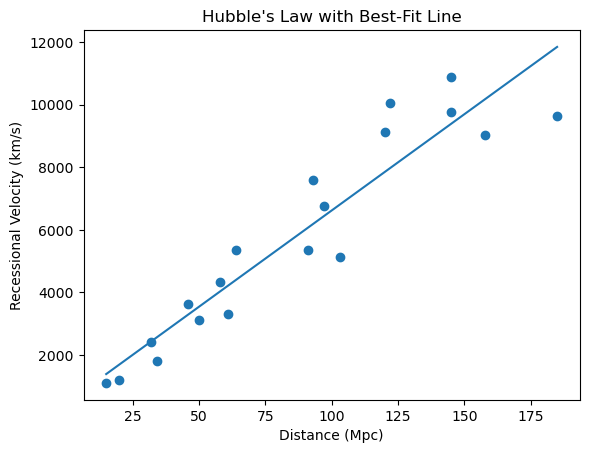

In [5]:
plt.scatter(D_final,v_final)
plt.plot(D_fit, v_fit)
plt.xlabel("Distance (Mpc)")
plt.ylabel("Recessional Velocity (km/s)")
plt.title("Hubble's Law with Best-Fit Line")
plt.show()

In [6]:
H0 = slope
H0_error = std_err
P_value=p_value
R_value=r_value
print(f"Hubble constant (H0): {H0:.2f} ± {H0_error:.2f} km/s/Mpc")
print(f"P Value:{P_value:.9f}")
print(f"P Value:{R_value:.9f}")

Hubble constant (H0): 61.56 ± 5.50 km/s/Mpc
P Value:0.000000003
P Value:0.938422101
